In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
import os

from bold_classifier import PsWidthHeigthClassifier
from dataset_reader.dataset_reader import Reader
from dataset_reader.drawer import Drawer

classifier = PsWidthHeigthClassifier()

rez = classifier.classify(pages[num_page].image, pages[num_page].bboxes)
# drawer.imshow(pages[num_page].image, pages[num_page].bboxes, rez)


In [111]:
ps = [0.4859, 0.5264, 0.6009, 0.7159, 0.4354, 0.5935, 0.5882, 0.5514, 0.5623, 0.5696, 0.4585, 0.5283, 0.4431, 0.5647, 0.5485, 0.9694, 0.979, 0.9576, 0.7029, 0.7742, 1, 0.9311, 0.7029, 1, 1, 0.9999, 1, 1, 0.7982, 0.9375, 0.8831, 1, 1, 0.9379, 1, 0.961, 0.9965, 0.9911, 0.8864, 0.96, 0.9254, 0.9231, 0.6463, 0.8935, 0.8253]

In [112]:
ps_label = np.zeros_like(ps)

In [113]:
ps_label[0:15] = 1
ps_label[18:20] = 1
ps_label[22:24] = 1

In [114]:
x_vec = np.zeros((len(ps), 2))

In [115]:
x_vec[:, 0] = ps[:]
x_vec[:, 1] = ps[:]

x_vec[1:, 1] += ps[:-1]
x_vec[:-1, 1] += ps[1:]
x_vec[0, 1] += ps[0]
x_vec[-1, 1] += ps[-1]
x_vec[:, 1] = x_vec[:, 1]/3
x_vec[:5, :]

array([[0.4859    , 0.4994    ],
       [0.5264    , 0.53773333],
       [0.6009    , 0.6144    ],
       [0.7159    , 0.58406667],
       [0.4354    , 0.5816    ]])

In [116]:
agg = AgglomerativeClustering(n_clusters=None, distance_threshold=0.3)
agg2 = AgglomerativeClustering()

In [117]:
agg.fit(x_vec)

AgglomerativeClustering(distance_threshold=0.3, n_clusters=None)

In [118]:
x_clusters = agg.labels_

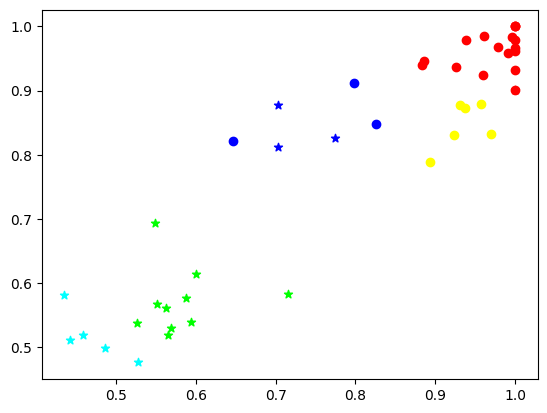

In [119]:
color = {
    0: "#f00",
    1: "#0f0",
    2: "#00f",
    3: "#ff0",
    4: "#0ff",
    5: "#f0f",
    6: "#f80",
    7: "#8f0",
}
mark = {
    0: "o",
    1: "*"
}

for p in zip(x_vec, x_clusters, ps_label):
    plt.scatter(p[0][0], p[0][1], color=color[p[1]], marker=mark[p[2]])

In [128]:
clusts = np.unique(x_clusters)

ps_vec = x_vec[:, 0]
ps_clusts = []
len_clusts = []
for i, c in enumerate(clusts):
    ps_clusts.append(ps_vec[x_clusters==c].mean())
    len_clusts.append(len(ps_vec[x_clusters==c]))
    
ps_clusts = np.array(ps_clusts)
clusters2 = agg2.fit(ps_clusts.reshape(-1, 1) )

for b in clusts[clusters2.labels_ == 1]:
    x_clusters[x_clusters == b] = 1
for r in clusts[clusters2.labels_ == 0]:
    x_clusters[x_clusters == r] = 0


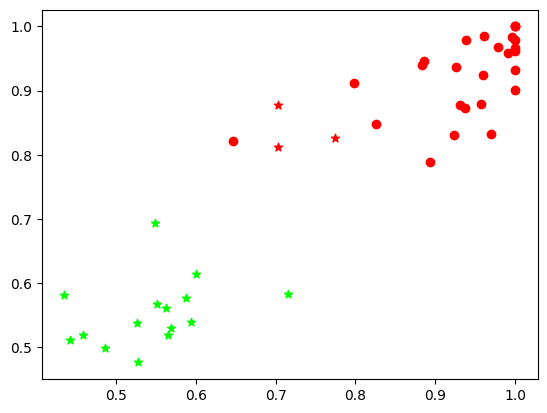

In [129]:
for p in zip(x_vec, x_clusters, ps_label):
    plt.scatter(p[0][0], p[0][1], color=color[p[1]], marker=mark[p[2]])

In [123]:
ps_clusts.reshape(-1, 1) 

array([[0.97335   ],
       [0.58214   ],
       [0.74163333],
       [0.93536667],
       [0.47024   ]])